In [ ]:
pip install yfinance pandas ta

In [ ]:
import yfinance as yf
import pandas as pd
from ta.momentum import RSIIndicator

def get_stock_analysis(ticker):
    stock = yf.Ticker(ticker)
    
    # Get historical data
    hist = stock.history(period="6mo")
    
    # Calculate RSI
    rsi = RSIIndicator(close=hist['Close']).rsi()
    latest_rsi = rsi.iloc[-1]
    
    # Get key metrics
    info = stock.info
    pe_ratio = info.get('trailingPE')
    debt_to_equity = info.get('debtToEquity')
    eps = info.get('trailingEps')
    market_cap = info.get('marketCap')
    
    # Decision engine
    pros, cons = [], []

    if latest_rsi < 30:
        pros.append(f"RSI is {latest_rsi:.2f}: stock is oversold (potential buy opportunity)")
    elif latest_rsi > 70:
        cons.append(f"RSI is {latest_rsi:.2f}: stock is overbought (possible correction)")

    if pe_ratio and pe_ratio < 15:
        pros.append(f"P/E ratio is {pe_ratio:.2f}: undervalued compared to industry")
    elif pe_ratio and pe_ratio > 30:
        cons.append(f"P/E ratio is {pe_ratio:.2f}: may be overvalued")

    if debt_to_equity and debt_to_equity < 100:
        pros.append(f"Debt-to-equity ratio is {debt_to_equity:.2f}: healthy leverage")
    elif debt_to_equity and debt_to_equity > 200:
        cons.append(f"Debt-to-equity ratio is {debt_to_equity:.2f}: high financial risk")

    return {
        "Stock": ticker,
        "Pros": pros,
        "Cons": cons,
        "Metrics": {
            "RSI": latest_rsi,
            "P/E Ratio": pe_ratio,
            "Debt/Equity": debt_to_equity,
            "EPS": eps,
            "Market Cap": market_cap
        }
    }

# Example usage
if __name__ == "__main__":
    result = get_stock_analysis("AAPL")
    print("📈 Analysis for:", result["Stock"])
    print("\n✅ Pros:")
    for pro in result["Pros"]:
        print("-", pro)
    print("\n⚠️ Cons:")
    for con in result["Cons"]:
        print("-", con)
    print("\n📊 Key Metrics:")
    for k, v in result["Metrics"].items():
        print(f"{k}: {v}")


In [ ]:
pip install streamlit


In [ ]:
# app.py

import streamlit as st
import yfinance as yf
from ta.momentum import RSIIndicator
import pandas as pd

def get_stock_analysis(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="6mo")
    
    if hist.empty:
        return None

    rsi = RSIIndicator(close=hist['Close']).rsi()
    latest_rsi = rsi.iloc[-1]

    info = stock.info
    pe_ratio = info.get('trailingPE')
    debt_to_equity = info.get('debtToEquity')
    eps = info.get('trailingEps')
    market_cap = info.get('marketCap')

    pros, cons = [], []

    if latest_rsi < 30:
        pros.append(f"RSI is {latest_rsi:.2f}: stock is oversold (potential buy opportunity)")
    elif latest_rsi > 70:
        cons.append(f"RSI is {latest_rsi:.2f}: stock is overbought (possible correction)")

    if pe_ratio and pe_ratio < 15:
        pros.append(f"P/E ratio is {pe_ratio:.2f}: undervalued compared to industry")
    elif pe_ratio and pe_ratio > 30:
        cons.append(f"P/E ratio is {pe_ratio:.2f}: may be overvalued")

    if debt_to_equity and debt_to_equity < 100:
        pros.append(f"Debt-to-equity ratio is {debt_to_equity:.2f}: healthy leverage")
    elif debt_to_equity and debt_to_equity > 200:
        cons.append(f"Debt-to-equity ratio is {debt_to_equity:.2f}: high financial risk")

    return {
        "Stock": ticker.upper(),
        "Pros": pros,
        "Cons": cons,
        "Metrics": {
            "RSI": latest_rsi,
            "P/E Ratio": pe_ratio,
            "Debt/Equity": debt_to_equity,
            "EPS": eps,
            "Market Cap": market_cap
        }
    }

# Streamlit UI
st.title("📊 Explainable Stock Recommendation")
ticker = st.text_input("Enter a stock ticker (e.g., AAPL, TSLA, MSFT):")

if ticker:
    result = get_stock_analysis(ticker)
    if result:
        st.subheader(f"📈 Analysis for {result['Stock']}")

        st.markdown("### ✅ Pros")
        if result["Pros"]:
            for pro in result["Pros"]:
                st.success(pro)
        else:
            st.info("No strong positive indicators found.")

        st.markdown("### ⚠️ Cons")
        if result["Cons"]:
            for con in result["Cons"]:
                st.warning(con)
        else:
            st.info("No strong warning indicators found.")

        st.markdown("### 📊 Key Metrics")
        st.table(pd.DataFrame(result["Metrics"], index=["Value"]).T)

    else:
        st.error("Stock data not found. Please check the ticker.")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


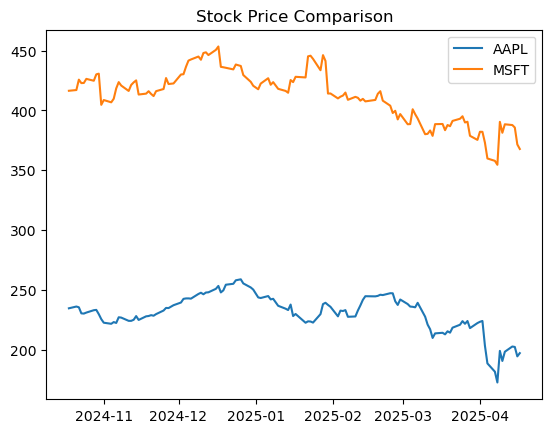

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT']
data = {ticker: yf.download(ticker, period='6mo') for ticker in tickers}

for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=ticker)

plt.title('Stock Price Comparison')
plt.legend()
plt.show()


In [3]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/624.3 kB 960.0 kB/s eta 0:00:01
   ------- -------------------------------- 122.9/624.3 kB 1.8 MB/s eta 0:00:01
   ---------------- ----------------------- 256.0/624.3 kB 2.6 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/624.3 kB 2.3 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/624.3 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.5 MB 4.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 5.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 4.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 5.0 MB/s eta 0:00:01


In [8]:
!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


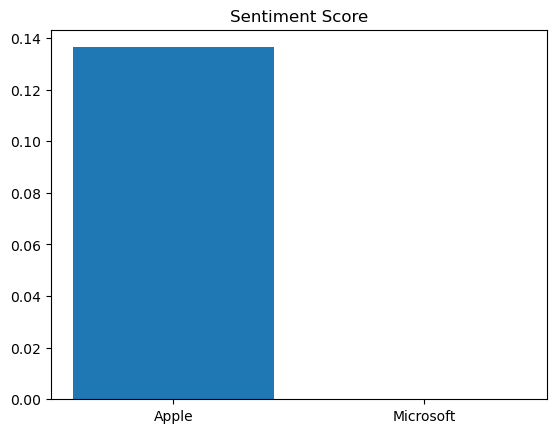

In [9]:
from textblob import TextBlob

articles = ["Apple launches new product", "Microsoft faces lawsuit"]
sentiments = [TextBlob(article).sentiment.polarity for article in articles]

plt.bar(['Apple', 'Microsoft'], sentiments)
plt.title('Sentiment Score')
plt.show()


[*********************100%***********************]  1 of 1 completed


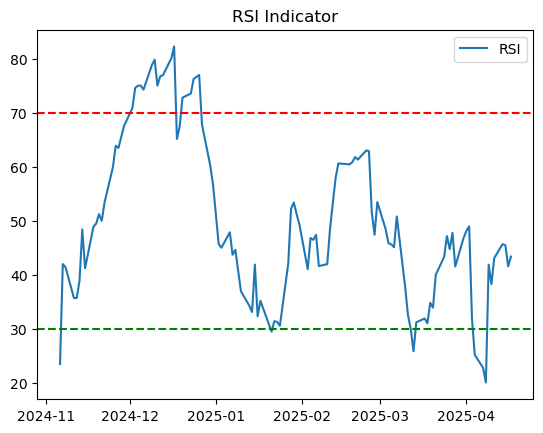

In [12]:
import ta

df = yf.download('AAPL', period='6mo')
df['RSI'] = ta.momentum.RSIIndicator(df[('Close', 'AAPL')]).rsi()

plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI Indicator')
plt.legend()
plt.show()


In [13]:
info = yf.Ticker('AAPL').info
print("PE Ratio:", info.get("trailingPE", "N/A"))


PE Ratio: 31.266665


In [18]:
import plotly.graph_objects as go

# Ensure the DataFrame has the correct structure
if isinstance(df.columns, pd.MultiIndex):
    # Access the correct columns for AAPL
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df[('Open', 'AAPL')],
        high=df[('High', 'AAPL')],
        low=df[('Low', 'AAPL')],
        close=df[('Close', 'AAPL')]
    )])
else:
    # If single-level columns, use them directly
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )])

fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [20]:
pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/545.2 kB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 204.8/545.2 kB 2.5 MB/s eta 0:00:01
   --------------------- ------------------ 286.7/545.2 kB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 450.6/545.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 2.9 MB/s eta 0:00:00


In [23]:
pip install lime xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


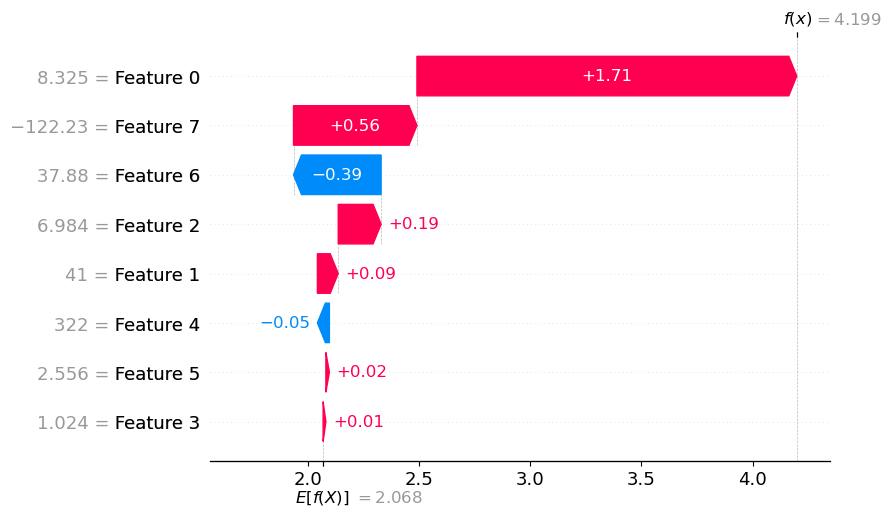

In [25]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target
model = xgb.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])  # or use .summary_plot()
